# Assignment 5

## 1. Choose a REGRESSION dataset (reusing bikeshare is allowed), perform a test/train split, and build a regression model (just like in assignment 3), and calculate the 
    + Training Error (MSE, MAE)
    + Testing Error (MSE, MAE)
## 2. Choose a CLASSIFICATION dataset (not the adult.data set, The UCI repository has many datasets as well as Kaggle), perform test/train split and create a classification model (your choice but DecisionTree is fine). Calculate 
    + Accuracy
    + Confusion Matrix
    + Classifcation Report
    
## 3. (Bonus) See if you can improve the classification model's performance with any tricks you can think of (modify features, remove features, polynomial features)

# 1) Regression

I located a  Medical Cost Personal Dataset here https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

In [88]:
#Getting ready

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [89]:
#Make the Dataframe and check it
dfc = pd.read_csv('insurance.csv') 
dfc.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [90]:
dfc.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [91]:
#Age and Charges seem like good variables
x = dfc[['age']]
y = dfc[['charges']]


In [93]:
linmod = linear_model.LinearRegression()
linmod.fit(x, y)
(linmod.coef_, linmod.intercept_)

(array([[257.72261867]]), array([3165.88500606]))

In [94]:
#Train, Test, Split 50/50
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5)

In [95]:
x.shape, x_train.shape, x_test.shape

((1338, 1), (669, 1), (669, 1))

In [96]:
model = LinearRegression()
model.fit(x_train, y_train)
model.coef_, model.intercept_


(array([[278.71968682]]), array([2148.39906589]))

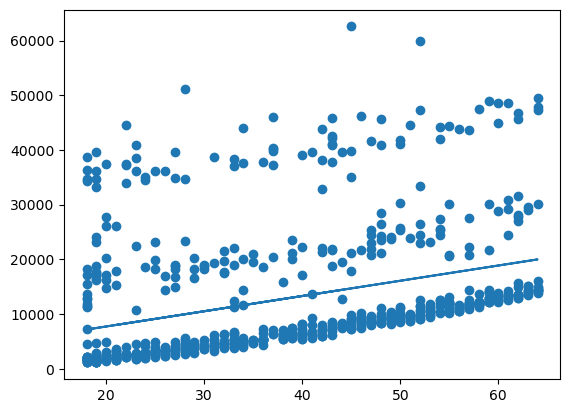

In [107]:
plt.scatter(x_test,y_test)
plt.plot(x_test, np.dot(x_test, model.coef_) + model.intercept_)

### Train Data MSE

In [98]:
mean_squared_error(y_train, np.dot(x_train, model.coef_) + model.intercept_)

134848387.8763608

### Train Data MAE

In [99]:
mean_absolute_error(y_train, np.dot(x_train, model.coef_) + model.intercept_) 

8988.419779992035

### Test Data MSE

In [100]:
mean_squared_error(y_test, np.dot(x_test, model.coef_) + model.intercept_)

132282967.40553232

### Test Data MAE

In [101]:
mean_absolute_error(y_test, np.dot(x_test, model.coef_) + model.intercept_) 

8958.958874443086

# 2) Classification

In [102]:
no_num_col = ['sex', 'region', 'smoker']
x = dfc.copy().drop(no_num_col, axis=1)
x


,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [103]:
def bmi_classification(bmi_value):
    if bmi_value < 30:
        return 0
    else:
        return 1

x['obese'] = x['bmi'].apply(bmi_classification)

x

,age,bmi,children,charges,obese
0,19,27.900,0,16884.92400,0
1,18,33.770,1,1725.55230,1
2,28,33.000,3,4449.46200,1
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0
...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1
1334,18,31.920,0,2205.98080,1
1335,18,36.850,0,1629.83350,1
1336,21,25.800,0,2007.94500,0


In [104]:
x.drop('bmi', axis=1, inplace=True)
x

,age,children,charges,obese
0,19,0,16884.92400,0
1,18,1,1725.55230,1
2,28,3,4449.46200,1
3,33,0,21984.47061,0
4,32,0,3866.85520,0
...,...,...,...,...
1333,50,3,10600.54830,1
1334,18,0,2205.98080,1
1335,18,0,1629.83350,1
1336,21,0,2007.94500,0


In [105]:
x.obese.value_counts()

1    707
0    631
Name: obese, dtype: int64

In [106]:
#time to get lost in some random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [72]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x.drop(['obese'], axis=1), x.obese)

DecisionTreeClassifier(criterion='entropy')

In [73]:
list(zip(x.drop(['obese'], axis=1).columns, model.feature_importances_))

[('age', 0.1796500645757731),
 ('children', 0.09215165020310372),
 ('charges', 0.7281982852211232)]

## Test Train Split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x.drop(['obese'], axis=1),x.obese, test_size=.50)

In [75]:
x.shape, x_train.shape, x_test.shape

((1338, 4), (669, 3), (669, 3))

In [82]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [83]:
test_predictions = model.predict(x_test)

### Accuracy

In [84]:
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, auc, roc_curve
                            )

In [85]:
accuracy_score(y_test, test_predictions)

0.6158445440956651

In [125]:
# Ouch!

### Confusion Matrix

In [86]:
confusion_matrix(y_test, test_predictions)

array([[178, 121],
       [136, 234]])

### Classification Report

In [81]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.57      0.60      0.58       299
           1       0.66      0.64      0.65       370

    accuracy                           0.62       669
   macro avg       0.61      0.62      0.61       669
weighted avg       0.62      0.62      0.62       669



# 3) Bonus

In [110]:
bonus_var = ['children', 'region']
bonus_set = dfc.copy().drop(bonus_var, axis=1)
bonus_set


,age,sex,bmi,smoker,charges
0,19,female,27.900,yes,16884.92400
1,18,male,33.770,no,1725.55230
2,28,male,33.000,no,4449.46200
3,33,male,22.705,no,21984.47061
4,32,male,28.880,no,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,no,10600.54830
1334,18,female,31.920,no,2205.98080
1335,18,female,36.850,no,1629.83350
1336,21,female,25.800,no,2007.94500


In [111]:
bonus_set['smoker'] = bonus_set.smoker.str.contains('yes').astype(int)
bonus_set.smoker.value_counts()


0    1064
1     274
Name: smoker, dtype: int64

In [114]:
bonus_set

#model = DecisionTreeClassifier(criterion='entropy')
#model.fit(bonus_set.drop(['smoker'], axis=1), bonus_set.smoker)

,age,sex,bmi,smoker,charges
0,19,female,27.900,1,16884.92400
1,18,male,33.770,0,1725.55230
2,28,male,33.000,0,4449.46200
3,33,male,22.705,0,21984.47061
4,32,male,28.880,0,3866.85520
...,...,...,...,...,...
1333,50,male,30.970,0,10600.54830
1334,18,female,31.920,0,2205.98080
1335,18,female,36.850,0,1629.83350
1336,21,female,25.800,0,2007.94500


In [115]:
bonus_set['sex'] = bonus_set['sex'].replace({'male': 1, 'female': 0})
bonus_set = bonus_set.rename(columns={'sex': 'is_male'})
bonus_set

,age,is_male,bmi,smoker,charges
0,19,0,27.900,1,16884.92400
1,18,1,33.770,0,1725.55230
2,28,1,33.000,0,4449.46200
3,33,1,22.705,0,21984.47061
4,32,1,28.880,0,3866.85520
...,...,...,...,...,...
1333,50,1,30.970,0,10600.54830
1334,18,0,31.920,0,2205.98080
1335,18,0,36.850,0,1629.83350
1336,21,0,25.800,0,2007.94500


In [117]:
x_train, x_test, y_train, y_test = train_test_split(bonus_set.drop(['smoker'], axis=1),bonus_set.smoker, test_size=.50)

In [118]:
x.shape, x_train.shape, x_test.shape

((1338, 3), (669, 4), (669, 4))

In [119]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [120]:
test_predictions = model.predict(x_test)

### Accuracy

In [121]:
accuracy_score(y_test, test_predictions)

0.9626307922272048

In [122]:
#Noice!

### Confusion Matrix

In [123]:
confusion_matrix(y_test, test_predictions)

array([[515,  15],
       [ 10, 129]])

### Classification Report

In [124]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       530
           1       0.90      0.93      0.91       139

    accuracy                           0.96       669
   macro avg       0.94      0.95      0.94       669
weighted avg       0.96      0.96      0.96       669

